In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [2]:
!pip install imblearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
# Read the csv file to a dataframe

stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print(f'Number of Rows: {stroke.shape[0]} rows')
print(f'Number of Features: {stroke.shape[1]} features')

Number of Rows: 5110 rows
Number of Features: 12 features


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#check missing value of the dataset
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#handling missing values with mean substitution
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace = True)

In [ ]:
#recheck missing values
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#check duplicate data
duplicate = stroke.duplicated()
stroke[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [ ]:
# #convert categorical column to numerical
# stroke = pd.get_dummies(stroke)
# stroke.head()

In [ ]:
####2.	Exploring Data:	Statistical data method

In [ ]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
print(stroke[numeric_features].describe())

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.698018
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.400000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


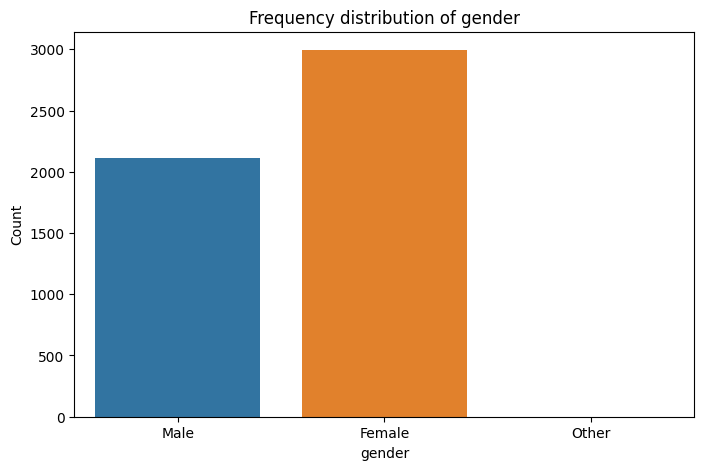

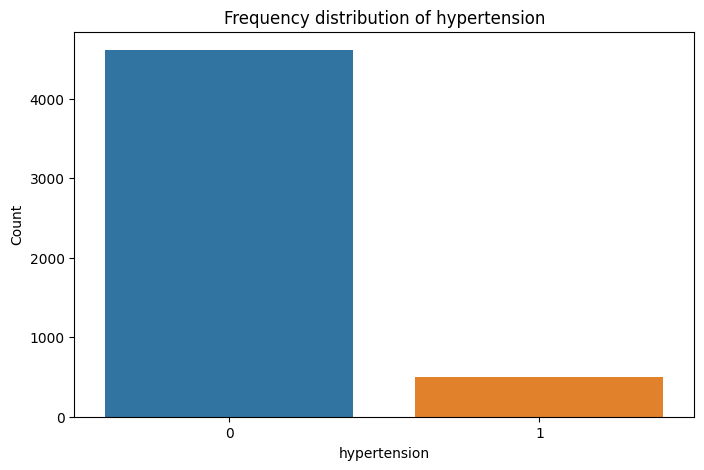

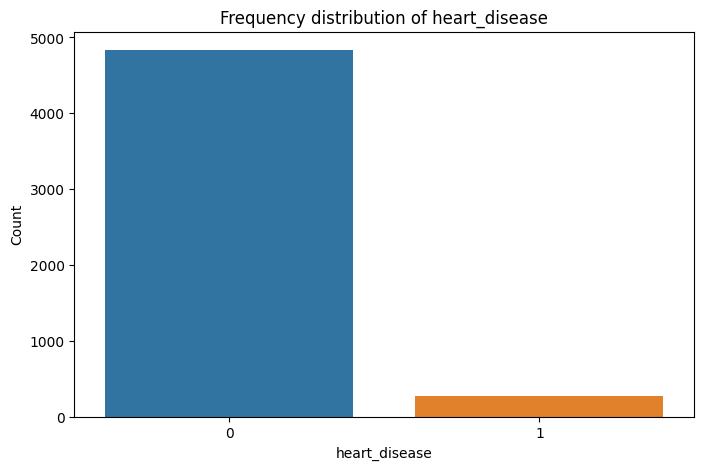

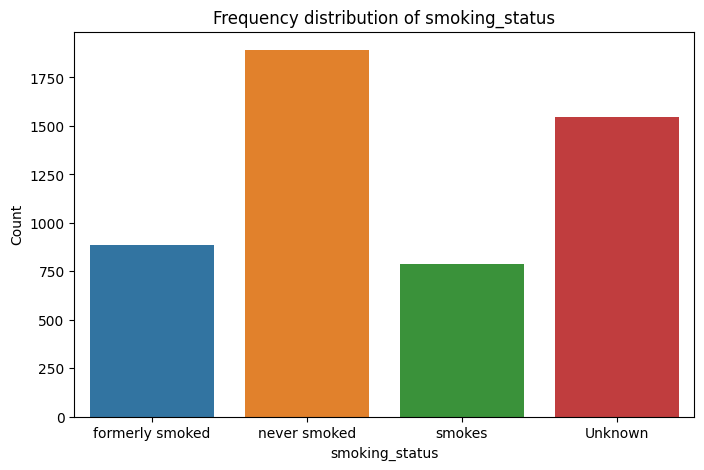


Summary statistics of gender :
count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

Summary statistics of hypertension :
count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Summary statistics of heart_disease :
count    5110.000000
mean        0.054012
std         0.226063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

Summary statistics of smoking_status :
count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object


In [ ]:
# Categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_status']

# Frequency distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=stroke)
    plt.title('Frequency distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Summary statistics of categorical features
for feature in categorical_features:
    print('\nSummary statistics of', feature, ':')
    print(stroke[feature].describe())

In [ ]:
stroke['gender']=stroke['gender'].replace('Other','Female')
#Since the proportion of values having Other is very less
#so we can impute it to female(as it was the most frequent occuring element).

In [ ]:
#do it again for age
def value_viz(feature,title):
    return px.pie(stroke,feature,title=title)

value_viz('gender','Distribution Of Gender')

In [ ]:
# Dispersion Analysis
for feature in numeric_features:
    print('\nRange of', feature, ':', stroke[feature].max() - stroke[feature].min())
    print('Variance of', feature, ':', stroke[feature].var())
    print('IQR of', feature, ':', stroke[feature].quantile(0.75) - stroke[feature].quantile(0.25))



Range of age : 81.92
Variance of age : 511.33179182433514
IQR of age : 36.0

Range of avg_glucose_level : 216.62
Variance of avg_glucose_level : 2050.600819911376
IQR of avg_glucose_level : 36.845

Range of bmi : 87.3
Variance of bmi : 59.25947846260943
IQR of bmi : 8.999999999999996


<Axes: xlabel='age'>

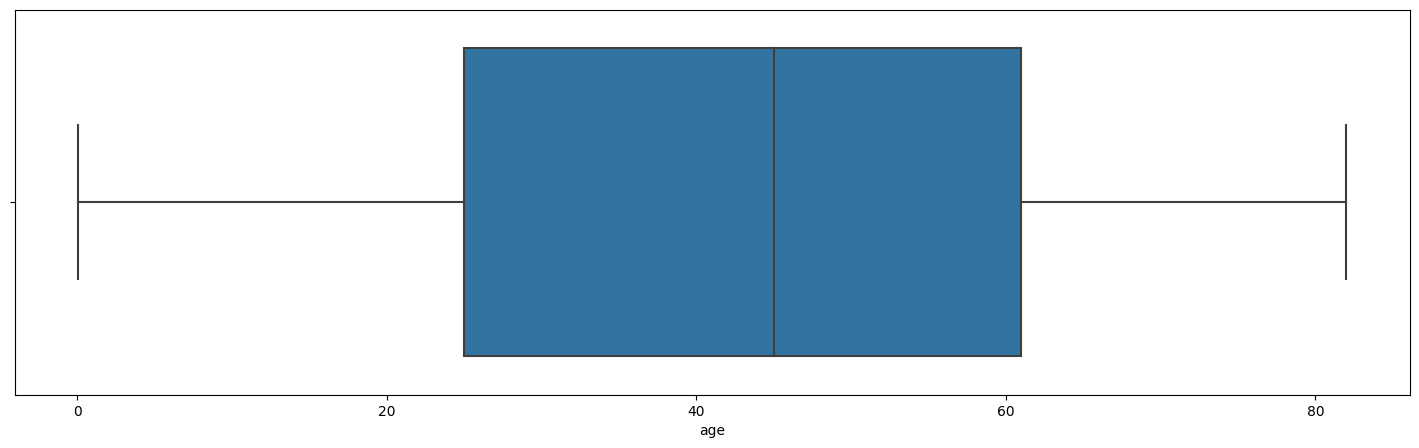

In [ ]:
# Outlier Detection
plt.figure(figsize=(18,5))
sns.boxplot(x='age',data=stroke)

In [ ]:
#No outliers in age feature.

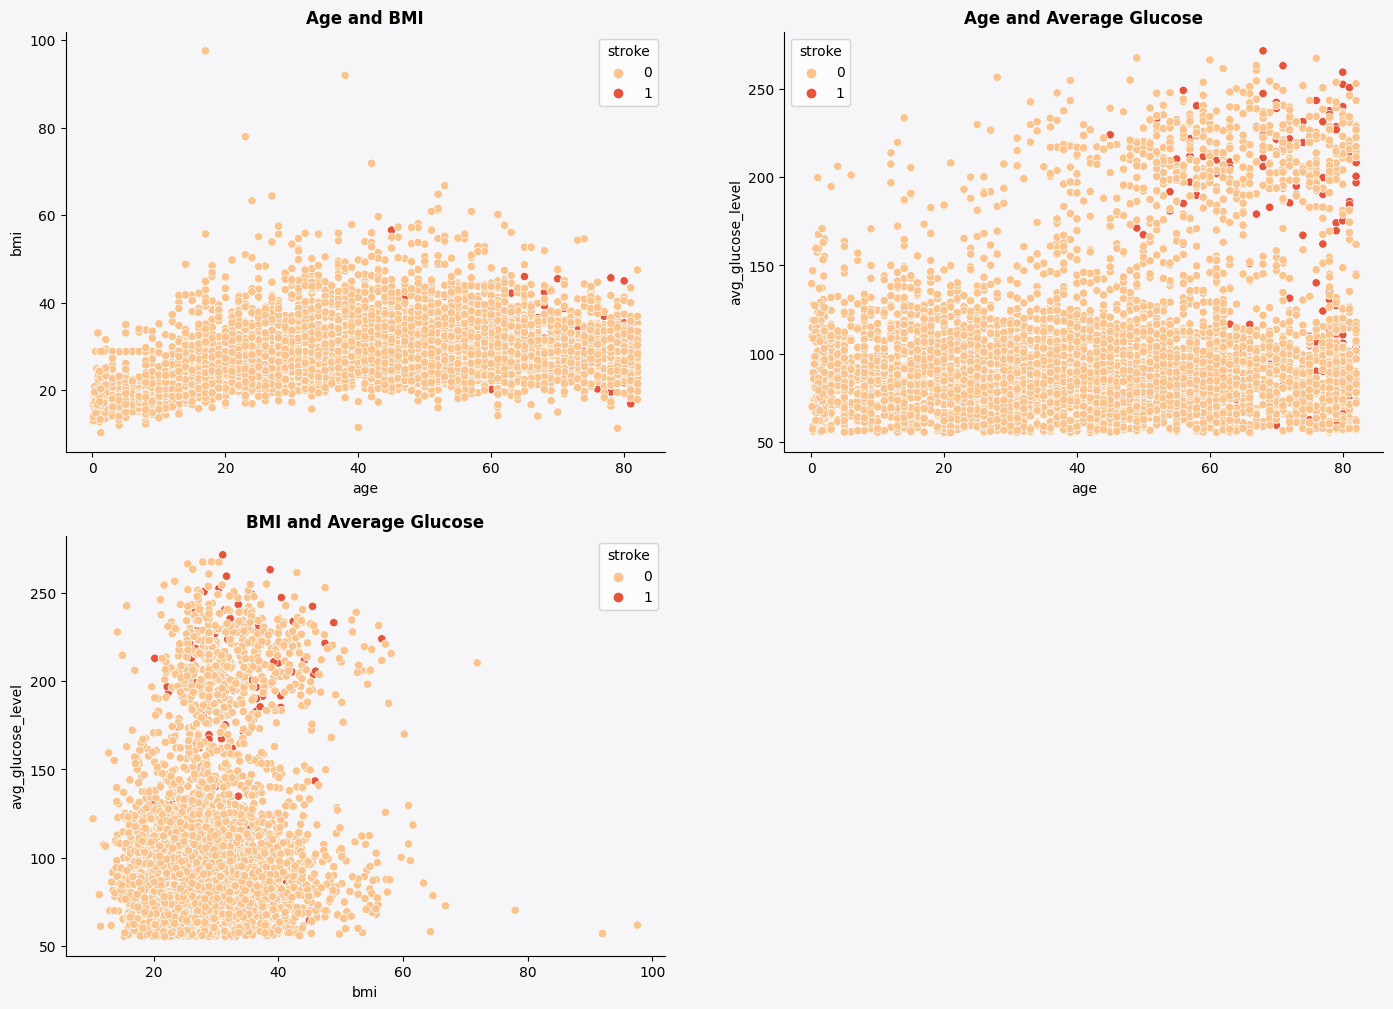

In [ ]:
data_numerical=stroke[['age','avg_glucose_level','bmi']]
data_categorical=stroke[['stroke']]

fig = plt.figure(figsize=(17,12))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)
# Age&bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bmi'],hue=data_categorical['stroke'],palette="OrRd")
ax0.set_title('Age and BMI',fontweight='bold')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax1.set_title('Age and Average Glucose',fontweight='bold')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['bmi'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax2.set_title('BMI and Average Glucose',fontweight='bold')
#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

1) There are very few sites where the data appear to be evenly distributed (stroke = 1).

2) BMI & Age and BMI & Avg Glucose Levels have few outliers (keeping them as few as they are).

3) The age group is evenly dispersed (no range has noticeably more people than others) between 0 and 60.

4) There are two clusters of ages and average glucose levels (one less than 150 and the other greater than that). Stroke only seldom occurred in persons with blood sugar levels under 150.

5) BMI and glucose levels show that those with glucose levels under 150 are less likely to experience strokes than people with glucose levels over 150. BMI >40 has low glucose average

In [6]:
# Discretization
# Example of equal-width binning for the 'age' feature
#stroke['age_bin'] = pd.cut(stroke['age'], bins=5)
#print('\nDiscrete categories for age:\n', stroke['age_bin'].value_counts())


Discrete categories for age:
 (49.232, 65.616]      1245
(32.848, 49.232]      1180
(65.616, 82.0]         965
(16.464, 32.848]       924
(-0.00192, 16.464]     796
Name: age_bin, dtype: int64


In [9]:
# Define the number of bins and bin labels
#num_bins = 4
#bin_labels = ['Low', 'Moderate', 'High', 'Very High']

# Perform discretization on 'avg_glucose_level'
#stroke['glucose_bin'] = pd.cut(stroke['avg_glucose_level'], bins=num_bins, labels=bin_labels)

# Display the frequency distribution of the discretized categories
#print(stroke['glucose_bin'].value_counts())


Low          3611
Moderate      849
High          414
Very High     236
Name: glucose_bin, dtype: int64


In [11]:
# # Define the bin boundaries and bin labels
#bin_boundaries = [0, 18.5, 24.9, 29.9, float('inf')]
#bin_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# # Perform discretization on 'bmi'
#stroke['bmi_bin'] = pd.cut(stroke['bmi'], bins=bin_boundaries, labels=bin_labels)

# # Display the frequency distribution of the discretized categories
#print(stroke['bmi_bin'].value_counts())


Obese            1920
Overweight       1409
Normal Weight    1231
Underweight       349
Name: bmi_bin, dtype: int64


In [ ]:
#convert categorical column to numerical
from sklearn.preprocessing import LabelEncoder

# create an label encoder instance
le = LabelEncoder()

# fit label
label_encode = ['gender','ever_married','work_type','Residence_type','smoking_status']
label = stroke[label_encode].apply(le.fit_transform)
stroke.update(label)
stroke.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
# Get X and Y variable
y=stroke.stroke
X=stroke.drop(['stroke','id'],axis=1)

# Store id column
id = stroke['id'].tolist()

# Splitting original dataset
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.3,random_state=27)

# Data Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using standard scaler to scale training data and apply it to testing data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Feature selection using RFE
from sklearn.feature_selection import RFE
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=11)
rfe = RFE(estimator=model,n_features_to_select=5)
rfe_feature=rfe.fit(X_train_scaled,Y_train)
print("Num Features: %s" % (rfe_feature.n_features_))
print("Selected Features: %s " % (X_train.columns[(rfe_feature.get_support())]))
print("Feature Ranking: %s" % (rfe_feature.ranking_))

# Get list of unselected features
feature_rmv= X_train.columns[np.logical_not(rfe.get_support())]
print("Removed Features: \n",feature_rmv)

# Drop unselected features and insert back sample column to dataset
rmv_X=pd.DataFrame()
rmv_X=X.drop(feature_rmv,axis=1)
rmv_X.insert(0,'id',id)
label_X=rmv_X.assign(stroke=y)
print(label_X)

# Print selected ranking features to output file
label_X.to_csv("RFE_data.csv",index=False)

print('Success! Results can be seen in result file')



Num Features: 5
Selected Features: Index(['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'], dtype='object') 
Feature Ranking: [2 1 4 5 6 1 3 1 1 1]
Removed Features: 
 Index(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type'],
      dtype='object')
         id   age work_type  avg_glucose_level        bmi smoking_status  \
0      9046  67.0         2             228.69  36.600000              1   
1     51676  61.0         3             202.21  28.893237              2   
2     31112  80.0         2             105.92  32.500000              2   
3     60182  49.0         2             171.23  34.400000              3   
4      1665  79.0         3             174.12  24.000000              2   
...     ...   ...       ...                ...        ...            ...   
5105  18234  80.0         2              83.75  28.893237              2   
5106  44873  81.0         3             125.20  40.000000              2   
5107  19723  35.0

[[0.94911937 0.00391389]
 [0.04696673 0.        ]]


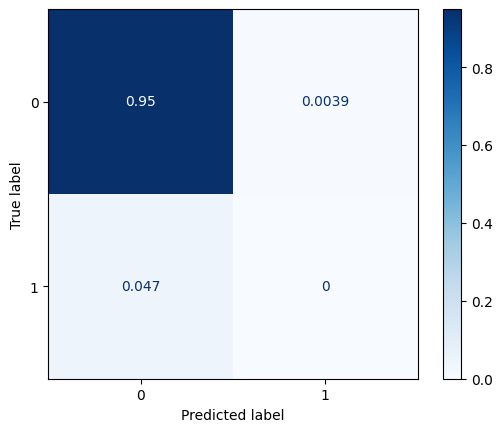

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1527
           1       0.00      0.00      0.00         6

    accuracy                           0.95      1533
   macro avg       0.50      0.48      0.49      1533
weighted avg       0.99      0.95      0.97      1533



In [ ]:
 # Load selected dataset
slct_stroke=pd.read_csv('RFE_data.csv')
X=slct_stroke.drop(['id','stroke'],axis=1)
y=slct_stroke.stroke

# Splitting original dataset
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.3,random_state=27)

# Train model
rf = RandomForestClassifier(random_state=25)
rf.fit(X_train,Y_train)
pred=rf.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        Y_test,
        cmap=plt.cm.Blues,
        normalize='all',
    )

print(disp.confusion_matrix)
plt.show()

# Print the result in classification report
print(classification_report(pred,Y_test))

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest - list down all possible parameters with default values, so many parameters can be tuned
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Make a dictionary of hyperparameter values to search
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
max_features = ['sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Train on training set
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=25), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=2)

In [ ]:
# Get the best hyperparameter values to search
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 350}

In [ ]:
rf.score(X_test, Y_test)

0.949119373776908

In [ ]:
rf_Grid.score(X_test, Y_test)

0.9530332681017613

In [ ]:
rf.score(X_train, Y_train)

1.0

In [ ]:
rf_Grid.score(X_train, Y_train)

0.9577858540676545